题目：

莺尾花数据分类

## 1.导入数据

导入库

In [30]:
import numpy as np
import pandas as pd                
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing                            # 引入用于数据预处理/特征工程的工具包
from sklearn import tree                                     # import决策树建模包
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split         # 用于分离train_data 和 test_data
from sklearn.metrics import accuracy_score                   # 评分用的包
from sklearn.pipeline import Pipeline
from sklearn import datasets                                 # 导入sklearn中的数据库（学习机器学习很好用！）
import pydotplus                                              # 可视化包
from IPython.display import display, Image

用sklearn里的莺尾花数据集

In [31]:
# 导入数据
iris = datasets.load_iris()    # 花的数据，sklearn中的数据库（就是上面的花）
X = iris.data             # X表示：花的属性
y = iris.target           # y表示：花的分类
# print(iris)

将矩阵改为DataFrame（方便可视化）

In [32]:
iris_df = pd.DataFrame(X,columns = ['flower lenth','flower width','calyx lenth','calyx width'])

In [33]:
iris_df

,flower lenth,flower width,calyx lenth,calyx width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 2.构造数据集

In [34]:
# 分离出训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## 3.训练数据

In [35]:
# 选择模型
model = DecisionTreeClassifier(criterion = 'entropy')
# 拟合数据
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
# 生成预测数据
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [37]:
# 评价得分
accuracy_score(y_test,y_pred)

0.9555555555555556

## 4.可视化

In [38]:
dot_data = tree.export_graphviz(model, 
                                out_file=None, 
                                feature_names=iris_df.columns,
                                class_names = ['0', '1','2'],
                                filled = True,
                                rounded =True
                               )

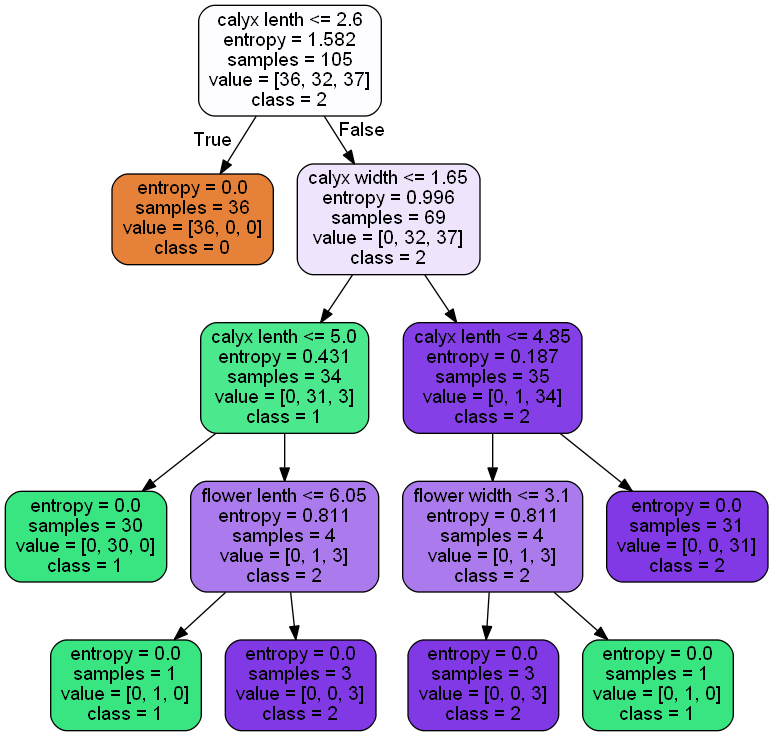

In [39]:
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

## 5.调试depth（深度）参数

In [40]:
# 过拟合，错误率(遍历所有的depth值，找出最好的)
depth = np.arange(1,15)
err_list = []
# 遍历所有的深度并打印错误率
for d in depth:
    clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = d)
    clf.fit(X_train,y_train)
    y_test_hat = clf.predict(X_test)
    
    result = (y_test_hat == y_test)
    
    if d == 1:
        print(result)
        
    err = 1 - np.mean(result)
    err_list.append(err)
    
    print(d, '错误率：%.2f%%' % (100 * err))

[ True False False  True  True False  True  True  True  True False  True
  True False False  True False False  True  True False False False  True
  True False  True  True False  True False  True False  True  True  True
 False  True False  True  True  True  True  True False]
1 错误率：40.00%
2 错误率：4.44%
3 错误率：4.44%
4 错误率：4.44%
5 错误率：4.44%
6 错误率：4.44%
7 错误率：4.44%
8 错误率：4.44%
9 错误率：4.44%
10 错误率：4.44%
11 错误率：4.44%
12 错误率：4.44%
13 错误率：4.44%
14 错误率：4.44%


画图

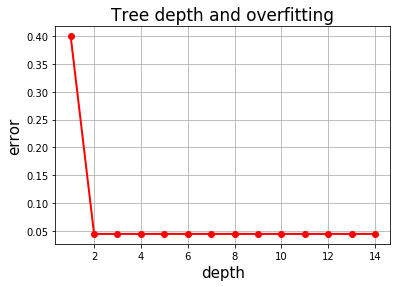

In [41]:
plt.figure(facecolor='w')
plt.plot(depth , err_list , 'ro-' , lw=2)
plt.xlabel('depth',fontsize = 15)
plt.ylabel('error',fontsize = 15)
plt.title('Tree depth and overfitting',fontsize = 17)
plt.grid(True)
plt.show()